In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 1.5 MB/s eta 0:00:00


In [ ]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 38.2 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=6154b19ced6172c2a61ed9b5b930b7fcc68d93a4240895f84d77a2a4f38d30db
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import QFT , CCXGate, UnitaryGate
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
vector = [1, 2, 3, 4, 5, 6, 7, 8]

vector_norm = np.linalg.norm(vector)
normalized_vector = vector / vector_norm

print(normalized_vector)
print(normalized_vector*vector_norm)

[0.070014   0.14002801 0.21004201 0.28005602 0.35007002 0.42008403
 0.49009803 0.56011203]
[1. 2. 3. 4. 5. 6. 7. 8.]


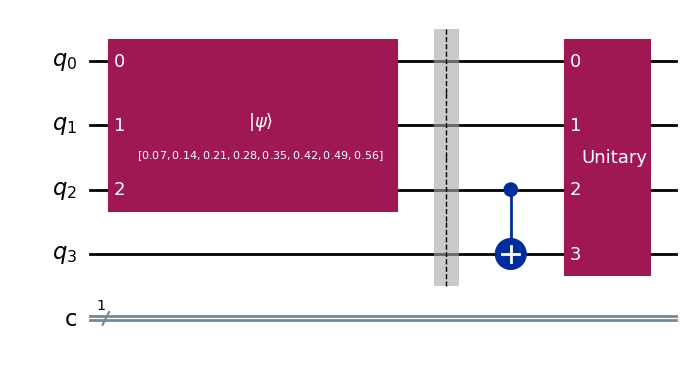

In [ ]:
# Initialize parameters
# window_scaling = 2.0062463823972267
# padded_result_coeffs = [2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
#     4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]
padded_result_coeffs = normalized_vector

num_qubits = int(np.log2(len(padded_result_coeffs)))
qc_test = QuantumCircuit(num_qubits + 1, 1)  # Increased from num_qubits*2 to num_qubits*3 for ancilla

# Inverted initialization
# qc_test.initialize(padded_result_coeffs, range(1,num_qubits+1))
qc_test.initialize(padded_result_coeffs, range(0,num_qubits))


# qc_test.append(QFT(num_qubits), range(num_qubits))
# qc_test.append(QFT(num_qubits), range(num_qubits, 2 * num_qubits))

# New code with CCX gates
qc_test.barrier()

qc_test.cx(2, 3)

# Define the original permutation matrix (acts on 3 qubits)
# perm_matrix = np.array([
#     [1, 0, 0, 0, 0, 0, 0, 0],
#     [0, 1, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 1, 0, 0, 0],
#     [0, 0, 0, 0, 0, 1, 0, 0],
#     [0, 0, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 1, 0],
#     [0, 0, 0, 0, 0, 0, 0, 1]
# ])

perm_matrix = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0]
])  # this is modified version of one before so that the last two coeffcients as well move up two places, this gives a neet output at the end with no zeroes in the middle like was the case with before

# Identity matrix for the other qubits
identity_matrix = np.eye(8)

# Construct the controlled matrix:
# Block matrix with identity on top-left and the permutation matrix on bottom-right
controlled_perm_matrix = np.block([
    [identity_matrix, np.zeros((8, 8))],
    [np.zeros((8, 8)), perm_matrix]
])

# print("Controlled Permutation Matrix:")
# print(controlled_perm_matrix)

# Create the unitary gate from the permutation matrix
unitary_gate = UnitaryGate(controlled_perm_matrix)

# Append the controlled gate, with qubit 2 as the control and qubits 0 and 1 as the target
qc_test.append(unitary_gate, [0 ,1 ,2, 3])

# Draw the circuit
qc_test.draw('mpl')

# qc_test.append(unitary_gate, [0, 1, 2])

In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)
print()
# print("adjusted Final Statevector:", np.sqrt(2)*np.abs(statevector))

[2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

Final Statevector: Statevector([0.070014  +0.j, 0.14002801+0.j, 0.21004201+0.j,
             0.28005602+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.35007002+0.j, 0.42008403+0.j,
             0.49009803+0.j, 0.56011203+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2, 2, 2))



[0.284459484,
 -0.160769035,
 -0.652830735,
 -0.140302564,
 0.404440838,
 -0.0549152208,
 -0.529882315,
 7.34968555e-16]

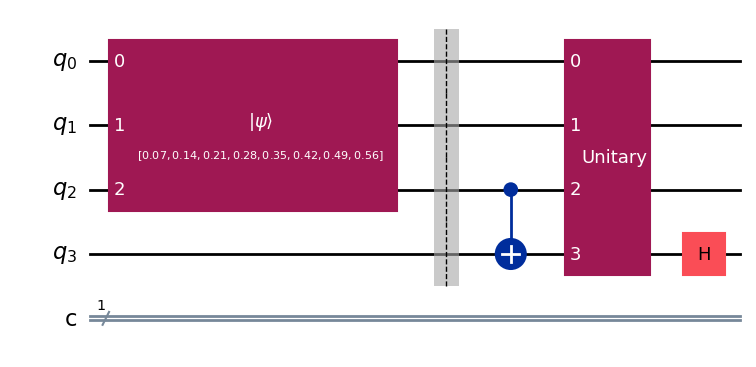

In [ ]:
qc_test.h(3)
qc_test.draw('mpl')

In [ ]:
# Use the Aer's Statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Transpile the quantum circuit for the simulator
compiled_circuit = transpile(qc_test, simulator)

# Run the simulation
result = simulator.run(compiled_circuit).result()

# Get the final statevector
statevector = result.get_statevector()

# Print the statevector
print("Final Statevector:", statevector)
print()
# print("adjusted Final Statevector with abs:", np.sqrt(2)*np.abs(statevector))
# print()
print("Adjusted Final Statevector [*sqrt(2)]:", np.sqrt(2)*statevector)
print()
print("Adjusted Final Statevector [*sqrt(2)] with real:", np.sqrt(2)*np.real(statevector))
print()
print("Adjusted Final Statevector [*vecotr_norm*sqrt(2)] with real:", vector_norm*np.sqrt(2)*np.real(statevector))
print()
print("Original vecotr:", vector)
print()


[2.84459484e-01, -1.60769035e-01, -6.52830735e-01, -1.40302564e-01,
    4.04440838e-01, -5.49152208e-02, -5.29882315e-01,  7.34968555e-16]

Final Statevector: Statevector([ 0.04950738+0.00000000e+00j,  0.09901475+0.00000000e+00j,
              0.39605902-3.03145255e-17j,  0.49507377-3.63774306e-17j,
              0.34655164-4.24403357e-17j,  0.39605902-4.85032408e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.04950738+0.00000000e+00j,  0.09901475+0.00000000e+00j,
             -0.09901475+3.03145255e-17j, -0.09901475+3.63774306e-17j,
             -0.34655164+4.24403357e-17j, -0.39605902+4.85032408e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2, 2))

Adjusted Final Statevector [*sqrt(2)]: Statevector([ 0.070014  +0.00000000e+00j,  0.14002801+0.00000000e+00j,
              0.56011203-4.28712131e-17j,  0.70014004-5.14454557e-17j,
              0.49009803-6.00196983e-17j,  0.56011203-6.85939409e-17j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.070014  +0.00000000e+00j,  0.14002801+0.0

[0.284459484,
 -0.160769035,
 -0.652830735,
 -0.140302564,
 0.404440838,
 -0.0549152208,
 -0.529882315,
 7.34968555e-16]

Check sum and difference with below:

sum:

-6.52830735e-01 + 4.04440838e-01 = −0.248389897

-1.40302564e-01 + -5.49152208e-02 = −0.195217784

difference:

-6.52830735e-01 - 4.04440838e-01 = −1.057271573

-1.40302564e-01 - -5.49152208e-02 = −0.0853873432